## Acessing Sample X corr data

{'network': 'ML', 'station': 'ML06', 'location': '', 'channel': 'BHZ', 'starttime': '2023-09-14T16:24:20.000000Z', 'endtime': '2023-09-14T16:24:49.990000Z', 'sampling_rate': 100.0, 'delta': 0.01, 'npts': 3000, 'calib': 1.0, '_format': 'MSEED', 'mseed': "AttribDict({'dataquality': 'D', 'number_of_records': 12, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})"}
         network: ML
         station: ML06
        location: 
         channel: BHZ
       starttime: 2023-09-14T16:24:20.000000Z
         endtime: 2023-09-14T16:24:49.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 12, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})


C:\Users\User\anaconda3\envs\eqt-project\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


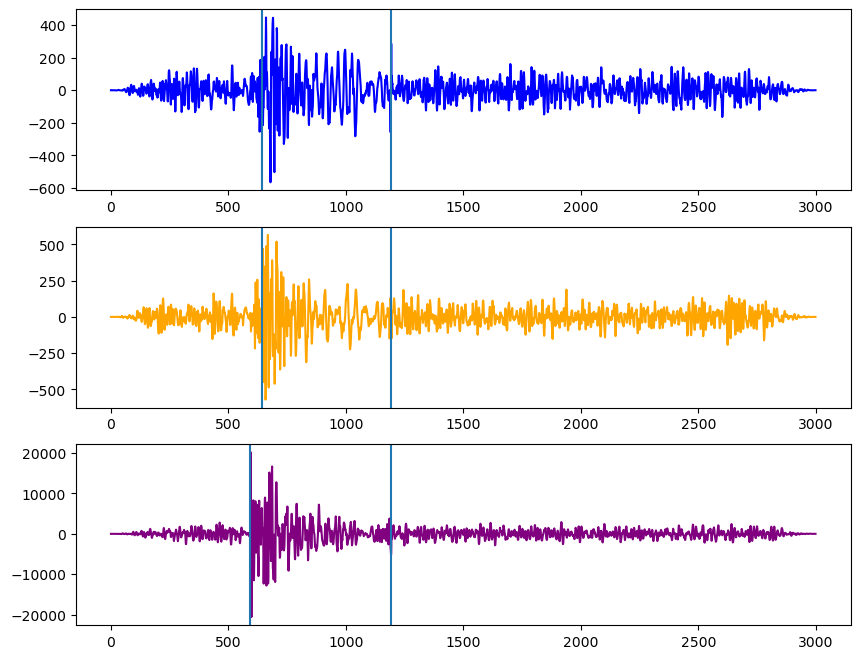

In [1]:
# read the xcorr data
import h5py
from pathlib import Path
from obspy import Trace
from obspy.core import Stats
import numpy as np
import matplotlib.pyplot as plt
import json

hd_data = Path(r"C:\Users\User\eqt-project\cross-correlation\xcorr.hdf5")
h5 = h5py.File(hd_data, 'r')

trace = h5['data']['ML06.ML_20230914T162420_EV']

tr_E = [i[0] for i in trace]
tr_N = [i[1] for i in trace]
tr_Z = [i[2] for i in trace]
tr_Z_mtd = json.loads(trace.attrs['chan_Z_metadata'])
print(tr_Z_mtd)

p_arr = trace.attrs['p_arrival_sample']
s_arr = trace.attrs['s_arrival_sample']
coda = trace.attrs['coda_end_sample']

fig, axs = plt.subplots(3,figsize =(10,8))
axs[0].plot(tr_E, color='blue')
axs[1].plot(tr_N, color='orange')
axs[2].plot(tr_Z, color='purple')
axs[0].axvline(s_arr)
axs[1].axvline(s_arr)
axs[2].axvline(p_arr)
axs[0].axvline(coda)
axs[1].axvline(coda)
axs[2].axvline(coda)
#axs[2].set_xlim(3000, 3500)
fig.show()

make_trace = Trace(np.array(tr_Z), header = tr_Z_mtd)
print(make_trace.stats)

In [1]:
import xcorr
from pathlib import Path
# do cross-correlation
pick_file = Path(r"C:\Users\User\eqt-project\comby_stead")
h5_file = Path(r"C:\Users\User\eqt-project\cross-correlation\xcorr.hdf5")
wave = Path(r"C:\Users\User\eqt-project\ai_seml_3_one_day")

xcorr.start_correlation(pick_file, h5_file, wave)



  8%|▊         | 4/49 [00:54<10:16, 13.69s/it]


KeyboardInterrupt: 